# GR5243 Project 1: Prodiction of Songs Popularity 
## Group Members: 
 - Jingyi Du (jd3882)
 - Jingyi Zhang (jz3543)
 - Jingyu Gu (jg4536)
 - Yuchen Wang (yw3890)

## 0. Environment Setting

In [ ]:
# import some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Encoding
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# Data Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

# Sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV as RSCV


# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_text

#stat
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Evaluations
from sklearn.metrics import mean_squared_error as MSE

## 1. Data Loading and Cleaning

### 1.1. Dataset Information

In [ ]:
# Import database
df = pd.read_csv('data.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns")

There are 169909 rows and 19 columns


In [ ]:
df.head()

acousticness                                   artists  danceability  \
0         0.995                       ['Carl Woitschach']         0.708   
1         0.994  ['Robert Schumann', 'Vladimir Horowitz']         0.379   
2         0.604                   ['Seweryn Goszczyński']         0.749   
3         0.995                      ['Francisco Canaro']         0.781   
4         0.990  ['Frédéric Chopin', 'Vladimir Horowitz']         0.210   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       158648  0.1950         0  6KbQ3uYMLKb5jDxLF7wYDD             0.563   
1       282133  0.0135         0  6KuQTIu1KoTTkLXKrwlLPV             0.901   
2       104300  0.2200         0  6L63VW0PibdM1HDSBoqnoM             0.000   
3       180760  0.1300         0  6M94FkXd15sOAOQYRnWPN8             0.887   
4       687733  0.2040         0  6N6tiFZ9vLTSOIxkj8qKrd             0.908   

   key  liveness  loudness  mode  \
0   10    0.1510   -12.428     1   
1    8    0.0763   -28.454     1   
2    5    0.1190   -19.924     0   
3    1    0.1110   -14.734     0   
4   11    0.0980   -16.829     1   

                                            name  popularity release_date  \
0                    Singende Bataillone 1. Teil           0         1928   
1       Fantasiestücke, Op. 111: Più tosto lento           0         1928   
2                 Chapter 1.18 - Zamek kaniowski           0         1928   
3  Bebamos Juntos - Instrumental (Remasterizado)           0   1928-09-25   
4    Polonaise-Fantaisie in A-Flat Major, Op. 61           1         1928   

   speechiness    tempo  valence  year  
0       0.0506  118.469   0.7790  1928  
1       0.0462   83.972   0.0767  1928  
2       0.9290  107.177   0.8800  1928  
3       0.0926  108.003   0.7200  1928  
4       0.0424   62.149   0.0693  1928

In [ ]:
df.describe().transpose()

count           mean            std     min          25%  \
acousticness      169909.0       0.493214       0.376627     0.0       0.0945   
danceability      169909.0       0.538150       0.175346     0.0       0.4170   
duration_ms       169909.0  231406.158973  121321.923219  5108.0  171040.0000   
energy            169909.0       0.488593       0.267390     0.0       0.2630   
explicit          169909.0       0.084863       0.278679     0.0       0.0000   
instrumentalness  169909.0       0.161937       0.309329     0.0       0.0000   
key               169909.0       5.200519       3.515257     0.0       2.0000   
liveness          169909.0       0.206690       0.176796     0.0       0.0984   
loudness          169909.0     -11.370289       5.666765   -60.0     -14.4700   
mode              169909.0       0.708556       0.454429     0.0       0.0000   
popularity        169909.0      31.556610      21.582614     0.0      12.0000   
speechiness       169909.0       0.094058       0.149937     0.0       0.0349   
tempo             169909.0     116.948017      30.726937     0.0      93.5160   
valence           169909.0       0.532095       0.262408     0.0       0.3220   
year              169909.0    1977.223231      25.593168  1921.0    1957.0000   

                            50%          75%          max  
acousticness           0.492000       0.8880        0.996  
danceability           0.548000       0.6670        0.988  
duration_ms       208600.000000  262960.0000  5403500.000  
energy                 0.481000       0.7100        1.000  
explicit               0.000000       0.0000        1.000  
instrumentalness       0.000204       0.0868        1.000  
key                    5.000000       8.0000       11.000  
liveness               0.135000       0.2630        1.000  
loudness             -10.474000      -7.1180        3.855  
mode                   1.000000       1.0000        1.000  
popularity            33.000000      48.0000      100.000  
speechiness            0.045000       0.0754        0.969  
tempo                114.778000     135.7120      244.091  
valence                0.544000       0.7490        1.000  
year                1978.000000    1999.0000     2020.000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

In [ ]:
# Drop useless columns 
df = df.drop(['artists','name','release_date','id'], axis=1)

### 1.2. Missing Values

In [ ]:
# Detection
# Columns that contain NA values
df.columns[df.isnull().any()]
df = df.dropna()

# Column names and the total number of NA values that each column contains
df[df.columns[df.isnull().any()]].isna().sum()

# Calculate Missing rate and dropping columns
missing_rate = np.sum(df.isna(), axis = 0).values/df.shape[0]
print(missing_rate)

# There is no NA Values in each column

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### 1.3 Features Division

In [ ]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'valence', 'year'],
      dtype='object')

In [ ]:
cate_feature = ['mode','explicit','key']
num_feature = ['acousticness', 'danceability', 'duration_ms', 'energy', 
               'instrumentalness', 'liveness', 'loudness', 'popularity', 
               'speechiness', 'tempo', 'valence', 'year']

## 2. Data Visualization

### 2.1 Dependent Variables: Popularity

#### 2.1.1 Distribution of Populaity

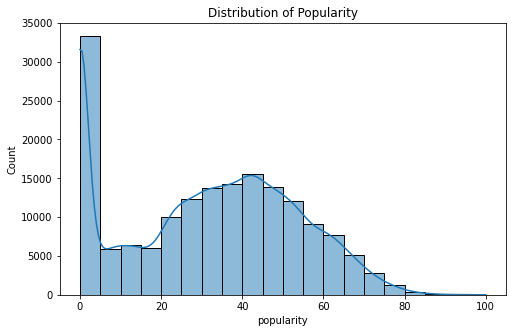

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.histplot(df['popularity'], bins=20, kde=True)
plt.title("Distribution of Popularity");

#### 2.1.2 Correlation between Populaity and Independent Variables

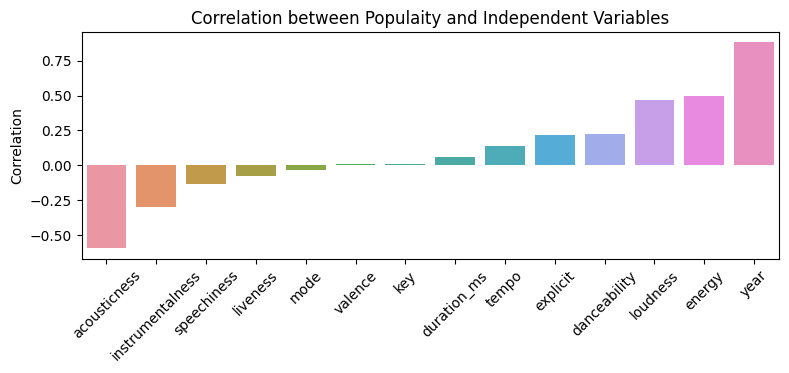

In [ ]:
# Show the correlations between popularity and features
# To get insights which feature will influence populaity and what will influence populaity least 

df_corr = df.corr()['popularity'].sort_values()[:-1]

fig, ax = plt.subplots(figsize=(9, 3), dpi=100)
ax = sns.barplot(x=df_corr.index, y=df_corr.values)
plt.title("Correlation between Populaity and Independent Variables")
plt.ylabel("Correlation")
plt.xticks(rotation=45);

### 2.2 Independent Variables

### 2.2.1 Correlation between independent variables 

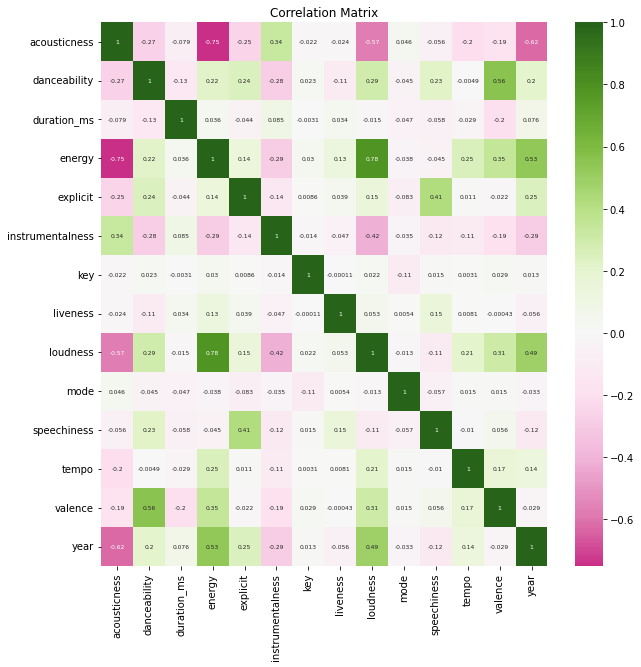

In [ ]:
# Correlation between independent variables 
# To test the collinearity

X_columns = [i for i in df.columns if i not in ['popularity']]
corr_matrix = df[X_columns].corr()
fig = plt.figure(figsize = (10,10))
plt.title('Correlation Matrix')
sns.heatmap(corr_matrix, annot=True, annot_kws={"size":6}, center=0, cmap="PiYG")
plt.show()

### 2.2.2 Boxplots of Categorical Features

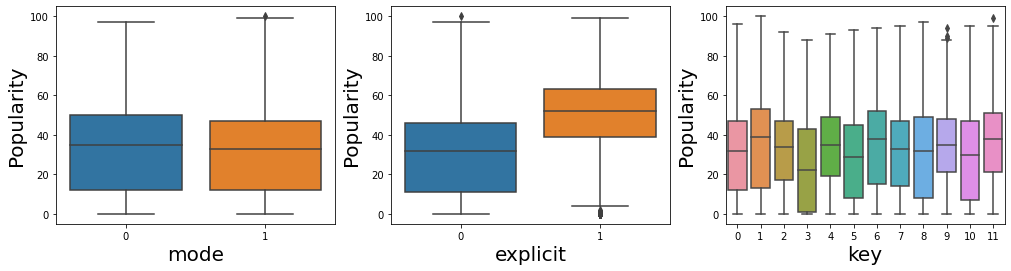

In [ ]:
# Categorical Features
# 可以consider一下要不要考虑dummy variables的影响
fig, ax=plt.subplots(nrows=1, ncols=3, figsize=(17,4))

for var, subplot in zip(cate_feature, ax.flatten()):
  b=sns.boxplot(x=var, y=df['popularity'], data=df, ax=subplot)
  b.set_xlabel(str(var), fontsize = 20)
  b.set_ylabel("Popularity", fontsize = 20)

#### 2.2.3 Histplots of Numerical Features

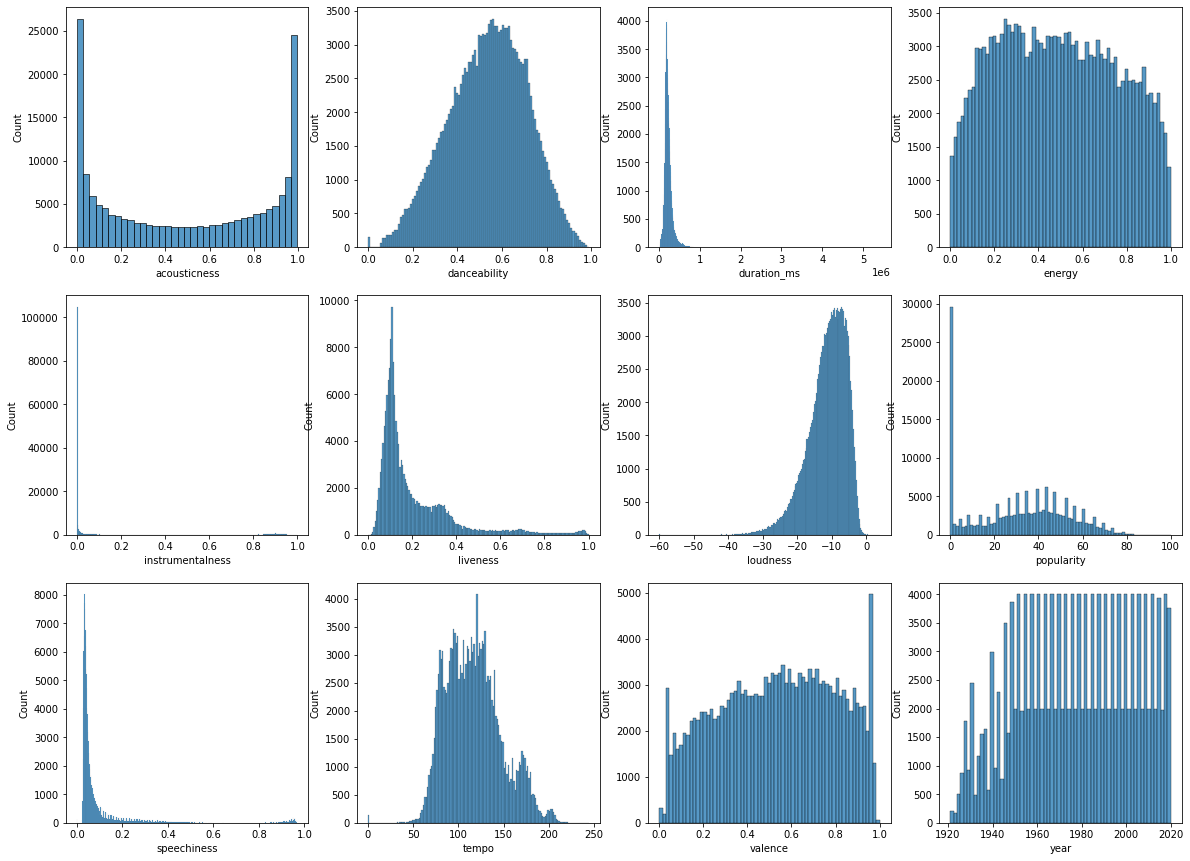

In [ ]:
# Numerical Features
fig, ax=plt.subplots(nrows=3, ncols=4, figsize=(20,15))
for feature, subplot in zip(num_feature, ax.flatten()):
    sns.histplot(x=df[feature],data=df, ax=subplot)

## 3. Data Processing

### 3.1 Categorical Features Encoding

In [ ]:
# Ordinal Encoding
ord_feature = ['key']

# One-Hot Encoding
ohe_feature = ['mode','explicit']

In [ ]:
ordinalencoder = OrdinalEncoder()
df_ord = ordinalencoder.fit_transform(df[ord_feature]).reshape(1,-1).tolist()[0]
df_ord = pd.DataFrame(df_ord)

ohe = OneHotEncoder()
df_ohe=ohe.fit_transform(df[ohe_feature])

ohe_array = df_ohe.toarray()
columns = ohe.get_feature_names_out()
df_ohe_all = pd.DataFrame(data = ohe_array, columns=['mode_0','mode_1','explicit_0','explicit_1'])

In [ ]:
df_ord

0
0       10.0
1        8.0
2        5.0
3        1.0
4       11.0
...      ...
169904   1.0
169905   8.0
169906   7.0
169907   1.0
169908   0.0

[169909 rows x 1 columns]

In [ ]:
df_ohe_all

mode_0  mode_1  explicit_0  explicit_1
0          0.0     1.0         1.0         0.0
1          0.0     1.0         1.0         0.0
2          1.0     0.0         1.0         0.0
3          1.0     0.0         1.0         0.0
4          0.0     1.0         1.0         0.0
...        ...     ...         ...         ...
169904     0.0     1.0         0.0         1.0
169905     0.0     1.0         1.0         0.0
169906     0.0     1.0         1.0         0.0
169907     0.0     1.0         1.0         0.0
169908     0.0     1.0         1.0         0.0

[169909 rows x 4 columns]

### 3.2 Train and Test Set Spliting

In [ ]:
# Concat to get the final dataset
df_final = pd.concat([df[num_feature], df_ohe_all,], axis=1)

In [ ]:
df_new=df_final.loc[df_final['year']>=1971]

In [ ]:
df_final.shape

(169909, 16)

In [ ]:
df_final

acousticness  danceability  duration_ms  energy  instrumentalness  \
0             0.9950         0.708       158648  0.1950          0.563000   
1             0.9940         0.379       282133  0.0135          0.901000   
2             0.6040         0.749       104300  0.2200          0.000000   
3             0.9950         0.781       180760  0.1300          0.887000   
4             0.9900         0.210       687733  0.2040          0.908000   
...              ...           ...          ...     ...               ...   
169904        0.1730         0.875       163800  0.4430          0.000032   
169905        0.0167         0.719       167468  0.3850          0.031300   
169906        0.5380         0.514       180700  0.5390          0.002330   
169907        0.0714         0.646       167308  0.7610          0.000000   
169908        0.1090         0.512       214787  0.4280          0.000000   

        liveness  loudness  popularity  speechiness    tempo  valence  year  \
0         0.1510   -12.428           0       0.0506  118.469   0.7790  1928   
1         0.0763   -28.454           0       0.0462   83.972   0.0767  1928   
2         0.1190   -19.924           0       0.9290  107.177   0.8800  1928   
3         0.1110   -14.734           0       0.0926  108.003   0.7200  1928   
4         0.0980   -16.829           1       0.0424   62.149   0.0693  1928   
...          ...       ...         ...          ...      ...      ...   ...   
169904    0.0891    -7.461          75       0.1430  100.012   0.3060  2020   
169905    0.1110   -10.907          64       0.0403  128.000   0.2700  2020   
169906    0.1080    -9.332          70       0.1050  123.700   0.1530  2020   
169907    0.2220    -2.557          70       0.0385  129.916   0.4720  2020   
169908    0.1050    -7.387          65       0.0271   80.588   0.3660  2020   

        mode_0  mode_1  explicit_0  explicit_1  
0          0.0     1.0         1.0         0.0  
1          0.0     1.0         1.0         0.0  
2          1.0     0.0         1.0         0.0  
3          1.0     0.0         1.0         0.0  
4          0.0     1.0         1.0         0.0  
...        ...     ...         ...         ...  
169904     0.0     1.0         0.0         1.0  
169905     0.0     1.0         1.0         0.0  
169906     0.0     1.0         1.0         0.0  
169907     0.0     1.0         1.0         0.0  
169908     0.0     1.0         1.0         0.0  

[169909 rows x 16 columns]

In [ ]:
y = df_final['popularity']
X = df_final.drop(['popularity'], axis=1)

In [ ]:
# Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

scaler = StandardScaler()

# Fit and transform scalar on X_train
X_train.columns = X_train.columns.astype(str)
X_train = scaler.fit_transform(X_train)  

# Transform X_val
X_test.columns = X_test.columns.astype(str)
X_test = scaler.transform(X_test)       

## 4. Meachine Learning: Regression

In [ ]:
# Fit a linear regression model
lr = LinearRegression().fit(X_train, y_train)

# Make predictions on the test set
yhat_rf = lr.predict(X_test)


In [ ]:
lr.score(X_train, y_train)

0.7834364577073742

In [ ]:
lr.score(X_test, y_test)

0.785539407214804

In [ ]:
mean_squared_error(y_test, yhat_rf)

100.68917701065479

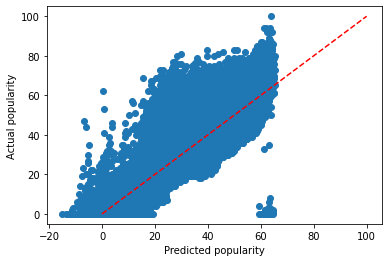

In [ ]:


# Plot the predicted vs actual values
plt.scatter(yhat_rf, y_test)
plt.xlabel('Predicted popularity')
plt.ylabel('Actual popularity')
plt.plot([0, 100], [0, 100], '--', color='red')
plt.show()

In [ ]:
# Perform feature selection
for i in range(1,16):
  selector = SelectKBest(f_regression, k=i)
  X_new = selector.fit_transform(X_train, y_train)

  # Print the selected features
  selected_features = X.columns[selector.get_support()]
  print(selected_features)


  #most important features are acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness', 'year'

Index(['year'], dtype='object')
Index(['acousticness', 'year'], dtype='object')
Index(['acousticness', 'energy', 'year'], dtype='object')
Index(['acousticness', 'energy', 'loudness', 'year'], dtype='object')
Index(['acousticness', 'energy', 'instrumentalness', 'loudness', 'year'], dtype='object')
Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'loudness', 'year'],
      dtype='object')
Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'loudness', 'year', 'explicit_1'],
      dtype='object')
Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'loudness', 'year', 'explicit_0', 'explicit_1'],
      dtype='object')
Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'loudness', 'speechiness', 'year', 'explicit_0', 'explicit_1'],
      dtype='object')
Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'loudness', 'speechiness', 'tempo', 'year', 'explicit_0', 'explic

In [ ]:
print(df_final.columns[:7])
print(df_final.columns[8:])

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness'],
      dtype='object')
Index(['speechiness', 'tempo', 'valence', 'year', 'mode_0', 'mode_1',
       'explicit_0', 'explicit_1'],
      dtype='object')


In [ ]:
lr.coef_

array([-1.53591828,  0.80976957,  0.05081846, -0.27031072, -0.77669475,
       -0.46334896,  0.16726247, -1.15209312,  0.15258958, -0.05629723,
       17.46652945,  0.05171866, -0.05171866, -0.06758168,  0.06758168])

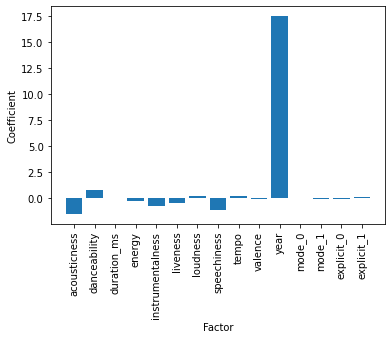

In [ ]:
# Get the coefficients of each factor
coefs=lr.coef_
# Plot the coefficients
x_strings = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'year', 'mode_0', 'mode_1',
       'explicit_0', 'explicit_1']
plt.bar(x_strings, coefs)
plt.xticks(rotation=90)
plt.xlabel('Factor')
plt.ylabel('Coefficient')
plt.show()

#越新的歌越受欢迎

## 5. Modelling: Decision Tree

### 5.1 Classifier

In [ ]:
#set 55 as threshold
#add a column called "p/np"

# check if the "popularity" column is greater than 55 and create a new column called "p/np"
df_final["p/np"] = ["PO" if x > 55 else "NP" for x in df_final["popularity"]]
df_final=df_final.drop(columns='year')
y_tree = df_final['p/np']
X_tree = df_final.drop(['popularity','p/np'], axis=1)

tX_train, tX_test, ty_train, ty_test = train_test_split(X_tree, y_tree, test_size=0.20, random_state=0)

scaler = StandardScaler()

# Fit and transform scalar on X_train
tX_train.columns=tX_train.columns.astype(str)
tX_train = scaler.fit_transform(tX_train)  

# Transform X_val
tX_test.columns=tX_test.columns.astype(str)
tX_test = scaler.transform(tX_test)       


In [ ]:
dt = DecisionTreeClassifier()

# Use grid search to find the optimal max depth value
max_depth_range = range(1, 11)
param_grid = {'max_depth': max_depth_range}
grid = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid.fit(tX_train, ty_train)

# Print the best max depth value and corresponding accuracy score
print('Best max depth value: {}'.format(grid.best_params_['max_depth']))
print('Best accuracy score: {:.2f}'.format(grid.best_score_))

KeyboardInterrupt: ignored

In [ ]:
#so set depth=9
tree_class = DecisionTreeClassifier(max_depth=9)
sc=cross_val_score(tree_class, tX_train, ty_train, cv=10)
tree_class.fit(tX_train, ty_train)
#plot
plt.figure(figsize=(50, 50))
features = X_tree.columns
plot_tree(tree_class, feature_names=features, class_names=["NP", "PO"], filled=True, rounded=True)
plt.show()

In [ ]:
#important features
importances = tree_class.feature_importances_
for feature, importance in zip(features, importances):
    print("{}: {}".format(feature, importance))

In [ ]:
sc.mean()

In [ ]:
tree_class.score(tX_test,ty_test)

### 5.2 Regressor

In [ ]:
tree_reg = DecisionTreeRegressor(max_depth=8)
sc_tr=cross_val_score(tree_reg, X_train, y_train, cv=10,scoring='neg_mean_squared_error')

# tree_reg.fit(X=X_train, y=y_train)

# tree_reg_pred = tree_reg.predict(X_test)

# #plot
# plt.figure(figsize=(20, 10))
# features = X_tree.columns
# plot_tree(tree_reg, feature_names=features, filled=True, rounded=True)
# plt.show()

In [ ]:
tree_reg.fit(X=X_train, y=y_train)

# tree_reg_pred = tree_reg.predict(X_test)

# #plot
plt.figure(figsize=(20, 20))
features = X_tree.columns
plot_tree(tree_reg, feature_names=features, filled=True, rounded=True)
plt.show()

In [ ]:
X

In [ ]:
tree_reg.fit(X=X_train, y=y_train)
importances = tree_reg.feature_importances_
for feature, importance in zip(features, importances):
    print("{}: {}".format(feature, importance))

In [ ]:
tree_reg.fit

In [ ]:
sc_tr=-sc_tr
sc_tr.mean()

In [ ]:
tree_reg1 = DecisionTreeClassifier(random_state=42)
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
grid_search = GridSearchCV(estimator=tree_reg1,param_grid=params,cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_search.fit(tX_train, ty_train)

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)


In [ ]:
score_df.nlargest(5,"mean_test_score")


In [ ]:
grid_search.best_estimator_


In [ ]:
tree_reg1_best = grid_search.best_estimator_

In [ ]:
def evaluate_model(tree_reg1_classifier):
    print("Train Accuracy :", accuracy_score(ty_train, tree_reg1_classifier.predict(tX_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(ty_train, tree_reg1_classifier.predict(tX_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, tree_reg1_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(ty_test, tree_reg1_classifier.predict(tX_test)))
evaluate_model(tree_reg1_best)

In [ ]:
print(classification_report(ty_test, tree_reg1_best.predict(tX_test)))

In [ ]:
reg_trees=DecisionTreeClassifier(max_depth=3, random_state=42)
reg_trees.fit(tX_train, ty_train)
reg_trees.score(tX_train, ty_train)

In [ ]:
reg_trees.score(tX_test, ty_test)

In [ ]:
for max_d in range(1,10):
  model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
  model.fit(tX_train, ty_train)
  print('The Training Accuracy for max_depth {} is:'.format(max_d), model.score(tX_train, ty_train))
  print('The Validation Accuracy for max_depth {} is:'.format(max_d), model.score(tX_test, ty_test))
  print('')

## 6. Modelling: Random Forest

### 6.1 Classifier

In [ ]:
rf_c = RandomForestClassifier(max_depth=9,max_features=0.6,max_samples=0.3,n_estimators=170,random_state=42)
# parameters = {'n_estimators':np.arange(50,200,15),
#               'max_features':np.arange(0.1, 1, 0.1),
#               'max_depth': [3, 5, 7, 9],
#               'max_samples': [0.3, 0.5, 0.8]}

# rf_c = RSCV(RandomForestClassifier(), parameters, n_iter = 15).fit(tX_train, ty_train)
# rf_c = rf_c.best_estimator_

#y_rfc_pred = model.predict(tX_test)
rf_c.fit(tX_train, ty_train)

RandomForestClassifier(max_depth=9, max_features=0.6, max_samples=0.3,
                       n_estimators=170, random_state=42)

In [ ]:
rf_c


RandomForestClassifier(max_depth=9, max_features=0.6, max_samples=0.3,
                       n_estimators=170, random_state=42)

In [ ]:
X_tree.columns

Index([    'acousticness',     'danceability',      'duration_ms',
                 'energy', 'instrumentalness',         'liveness',
               'loudness',      'speechiness',            'tempo',
                'valence',                  0,           'mode_0',
                 'mode_1',       'explicit_0',       'explicit_1'],
      dtype='object')

In [ ]:
importances = rf_c.feature_importances_
for feature, importance in zip(list(X_tree.columns), importances):
    print("{}: {}".format(feature, importance))


acousticness: 0.10228705349813934
danceability: 0.06043195379580909
duration_ms: 0.07881089810549999
energy: 0.0886990152865896
instrumentalness: 0.0692404852550214
liveness: 0.025716507564367094
loudness: 0.2908985174114457
speechiness: 0.03903926172114891
tempo: 0.022748061091851565
valence: 0.06783958544875394
0: 0.006052639956904237
mode_0: 0.0018246591467902331
mode_1: 0.0018495508209127745
explicit_0: 0.07251572347512701
explicit_1: 0.0720460874216393


In [ ]:
# Random forest accuracy
rf_c.score(tX_test,ty_test)

0.8751397798834677

### 6.2 Regressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV as RSCV

# rf_reg = RandomForestRegressor(random_state=42)
# rf_reg.fit(X_train, y_train)
parameters = {'n_estimators':np.arange(50,200,15),
              'max_features':np.arange(0.1, 1, 0.1),
              'max_depth': [3, 5, 7, 9],
              'max_samples': [0.3, 0.5, 0.8]}

model_reg = RSCV(RandomForestRegressor(), parameters, n_iter = 15).fit(X_train, y_train)
model_reg = model_reg.best_estimator_
# y_rfr_pred = rf_reg.predict(X_test)

In [ ]:
rf_reg=model_reg#(max_depth=7, max_features=0.8, max_samples=0.3,n_estimators=50)
rf_reg

RandomForestRegressor(max_depth=7, max_features=0.8, max_samples=0.3,
                      n_estimators=50)

In [ ]:
X_tree.columns

Index([    'acousticness',     'danceability',      'duration_ms',
                 'energy', 'instrumentalness',         'liveness',
               'loudness',      'speechiness',            'tempo',
                'valence',                  0,           'mode_0',
                 'mode_1',       'explicit_0',       'explicit_1'],
      dtype='object')

In [ ]:
importances = rf_reg.feature_importances_
for feature, importance in zip(list(X_tree.columns), importances):
    print("{}: {}".format(feature, importance))


acousticness: 0.08428922726506977
danceability: 0.0010610447045883284
duration_ms: 0.0032700878669652406
energy: 0.006683973245086081
instrumentalness: 0.0014210548738033053
liveness: 0.001245780040477145
loudness: 0.008514787209200358
speechiness: 0.003562735443443504
tempo: 0.0004302872372741663
valence: 0.0005391679910090687
0: 0.8866071436348881
mode_0: 0.00010391974344007226
mode_1: 1.1787163317825361e-05
explicit_0: 2.4631353756549043e-05
explicit_1: 0.0013695631609387563


In [ ]:
#R2
rf_reg.score(X_test,y_test)

0.8253262975765551

In [ ]:
#random forest regressor mse
y_rfr_pred = rf_reg.predict(X_test)
mean_squared_error(y_test,y_rfr_pred)

82.00924521381229

## 7.Modelling: SVM

In [ ]:
from sklearn.svm import LinearSVR
svr = LinearSVR()

# Define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100]}

# Create a GridSearchCV object
grid = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Train the model using the training sets
grid.fit(X_train, y_train)
print(grid.best_params_) 
# Predict the target values of test data
svr_mse = -grid.score(X_test,y_test)
svr_mse

{'C': 1}


103.90110705224554

In [ ]:
#so set C=0.1
lsvr = LinearSVR(C=0.1)
lsvr.fit(X_train, y_train)

LinearSVR(C=0.1)

In [ ]:
pip install --upgrade sklearn.svm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement sklearn.svm (from versions: none)
ERROR: No matching distribution found for sklearn.svm


In [ ]:
importance_svr = lsvr.coef_

In [ ]:
x_strings = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'year', 'mode_0', 'mode_1',
       'explicit_0', 'explicit_1']

In [ ]:
for feature, importance in zip(x_strings, importance_svr):
    print("{}: {}".format(feature, importance))

acousticness: -1.2945572222958195
danceability: 1.0775196818034136
duration_ms: 0.056826687553230566
energy: -0.4192223329046461
instrumentalness: -0.5637348652115035
liveness: -0.3375219369695632
loudness: 0.22461017609192097
speechiness: -0.8870343340740054
tempo: 0.2060539273778213
valence: -0.18053652552965213
year: 17.916642097083205
mode_0: 0.12115338379752683
mode_1: -0.12115338379752683
explicit_0: -0.10570507993125697
explicit_1: 0.1057050799312301


In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(svr, n_features_to_select=3)
rfe.fit(X_train, y_train)

# Print the selected features
print("Selected Features: ")
print(X.columns[rfe.support_])

Selected Features: 
Index(['acousticness', 'danceability', 'year'], dtype='object')


In [ ]:
grid.best_estimator_.coef_

array([-1.28690246,  1.0896883 ,  0.07374776, -0.40941584, -0.58997839,
       -0.34386718,  0.19979053, -0.89219877,  0.19674219, -0.19322019,
       17.95081656,  0.13112292, -0.13112292, -0.15180356,  0.15180356])

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC(max_iter=1500,dual=False)
param_grid = {'C': [0.1, 1, 10,100]}

# Create a GridSearchCV object
grid = GridSearchCV(svc, param_grid, cv=5,scoring='accuracy', n_jobs=-1)

# Train the model using the training sets
grid.fit(X_train, y_train)
print(grid.best_params_)
# Predict the target values of test data
svc_accuracy = grid.score(tX_test,ty_test)
svc_accuracy

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
#so set C=0.1
from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=0.1)
lsvc.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
importance_svc = lsvc.coef_

In [ ]:
for feature, importance in zip(x_strings, importance_svc):
    print("{}: {}".format(feature, importance))

In [ ]:
x_strings = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'year', 'mode_0', 'mode_1',
       'explicit_0', 'explicit_1']

In [ ]:
grid.best_estimator_.coef_

array([[-0.08947149,  0.14101874, -0.05591967, -0.02467932, -0.01652234,
        -0.03588347,  0.18785643, -0.08327815,  0.02358553, -0.17395067,
         0.00735492, -0.00735492, -0.05969634,  0.05969634]])

## 8. Evaluate the model

### 8.1 Using RMSE to evaluate the performance of Regression

RMSE

In [ ]:
#Measure the performance of LinearRegression Model 
lr_mse = mean_squared_error(y_test,yhat_rf)

lr_mse

ValueError: ignored

In [ ]:
#Evaluate the model using DecisionTreeRegressor
tree_reg_pred = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test,tree_reg_pred)

tree_mse

82.70101384707216

In [ ]:
#random forest -- best
rf_mse=mean_squared_error(y_test,y_rfr_pred)
rf_mse

NameError: ignored

In [ ]:
# SVM
svr_mse

NameError: ignored

### 8.2 Accuracy evaluting performance of classification model







In [ ]:

#decision tree
tree_class.score(tX_test,ty_test)

0.8697251486080866

In [ ]:
tree_reg.score(X_test,y_test)

0.8238528809138743

In [ ]:
#Random forest--best
rf_c.score(tX_test,ty_test)

In [ ]:
#SVM
svc_accuracy

In [ ]:
# #We use Cross_Validation to evaluate the model
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(estimator=tree_reg, X=X_train, y=y_train, scoring='neg_mean_squared_error', cv=10)
# tree_rmse_scores = np.sqrt(-scores)
# def display_scores(scores):
#     """Displays the scores, their mean, and the standard deviation.
    
#     # Arguments:
#         scores, np.array: list of scores given by the cross validation procedure.
#     """
#     print("Scores:", scores)
#     print("Mean:", scores.mean())
#     print("Standard Deviation:", scores.std())

In [ ]:
nums=[3,1,2,4]
begin,end=0,len(nums)-1
while begin<end:
    if begin%2==0:
        begin+=1
    else:
        nums[begin],nums[end]=nums[end],nums[begin]
        end-=1
    

In [ ]:
nums

In [ ]:
int('1001',2)

In [ ]:
1234%10

In [ ]:
1234//10

In [ ]:
[1]*10

In [ ]:
"sadbutsad"[8:10]

In [ ]:
n=4
x=[1]*n
x[1]=2
for i in range(2,n):
    x[i]=x[i-1]+x[i-2]

print(x[n-1])

In [ ]:
'Aibnio'.lower()

In [ ]:
ord('A')

In [ ]:
chr(65)